In [354]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# importing dataset

df=pd.read_csv(r"C:\DATASCIENCE\DATASET\CSV\social_media_engagement\social_media_engagement1.csv")

# importing top 5 and last 5 data from the dataset


print(df.head(5))
print(df.tail(5))


   post_id   platform post_type        post_time  likes  comments  shares  \
0        1   Facebook     image  8/17/2023 14:45   2121       474     628   
1        2   Facebook  carousel   5/14/2023 0:45   3660       432     694   
2        3  Instagram      poll  2/21/2023 16:15   4955       408     688   
3        4    Twitter     image  11/16/2023 0:45   1183        90     187   
4        5    Twitter     video   5/23/2023 0:30   3499       247     286   

   post_day sentiment_score  
0  Thursday        positive  
1    Sunday         neutral  
2   Tuesday        negative  
3  Thursday        negative  
4   Tuesday        positive  
    post_id   platform post_type         post_time  likes  comments  shares  \
95       96  Instagram  carousel   7/12/2023 17:45     36       294     911   
96       97    Twitter     video  10/27/2023 23:45    314       108     458   
97       98    Twitter      text     8/5/2023 8:45    229       179      38   
98       99  Instagram      poll  12/29/2

In [355]:
# basic informations about dataset

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   post_id          100 non-null    int64 
 1   platform         100 non-null    object
 2   post_type        100 non-null    object
 3   post_time        100 non-null    object
 4   likes            100 non-null    int64 
 5   comments         100 non-null    int64 
 6   shares           100 non-null    int64 
 7   post_day         100 non-null    object
 8   sentiment_score  100 non-null    object
dtypes: int64(4), object(5)
memory usage: 7.2+ KB


In [356]:
# describe the data distributions
df.describe()

,post_id,likes,comments,shares
count,100.000000,100.000000,100.00000,100.000000
mean,50.500000,2381.810000,202.66000,415.650000
std,29.011492,1632.573284,138.84067,283.877601
min,1.000000,15.000000,10.00000,16.000000
25%,25.750000,895.750000,89.75000,183.000000
50%,50.500000,2220.000000,171.00000,356.500000
75%,75.250000,3593.250000,299.00000,689.500000
max,100.000000,5000.000000,500.00000,993.000000


In [357]:
# DATA CLEANING

# to find missing values in each column
print(df.isnull().sum())

# find missing values in dataframe (row)
print(df.isnull().sum().sum())


post_id            0
platform           0
post_type          0
post_time          0
likes              0
comments           0
shares             0
post_day           0
sentiment_score    0
dtype: int64
0


In [358]:
# to remove null and empty values
new_df=df.dropna()
print(new_df.head())

   post_id   platform post_type        post_time  likes  comments  shares  \
0        1   Facebook     image  8/17/2023 14:45   2121       474     628   
1        2   Facebook  carousel   5/14/2023 0:45   3660       432     694   
2        3  Instagram      poll  2/21/2023 16:15   4955       408     688   
3        4    Twitter     image  11/16/2023 0:45   1183        90     187   
4        5    Twitter     video   5/23/2023 0:30   3499       247     286   

   post_day sentiment_score  
0  Thursday        positive  
1    Sunday         neutral  
2   Tuesday        negative  
3  Thursday        negative  
4   Tuesday        positive  


In [359]:
# drop rows with mising value in the whole dataset
df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   post_id          100 non-null    int64 
 1   platform         100 non-null    object
 2   post_type        100 non-null    object
 3   post_time        100 non-null    object
 4   likes            100 non-null    int64 
 5   comments         100 non-null    int64 
 6   shares           100 non-null    int64 
 7   post_day         100 non-null    object
 8   sentiment_score  100 non-null    object
dtypes: int64(4), object(5)
memory usage: 7.2+ KB


In [360]:
# checking duplicate rows in each column

df.duplicated().sum()


0

In [361]:
# data with condition

# Engagement column
df['engagement'] = df['likes'] + df['comments'] + df['shares']

# High Engagement (> 3000)

high_engagement = df[df['engagement'] > 3000]
print("\nHigh Engagement Posts:\n", high_engagement)

# classify Engagement Level
df["engagement_level"] = df["engagement"].apply(
    lambda x: "High" if x > 3000 else "Low"
)
print("\nEngagement Level:\n", df[["engagement", "engagement_level"]])


# assign Sentiment Type
def sentiment_category(score):
    if score == "positive":
        return "Good"
    else:
        return "Not Good"

df["sentiment_type"] = df["sentiment_score"].apply(sentiment_category)
print("\nSentiment Type:\n", df[["sentiment_score", "sentiment_type"]])


# label posts by Engagement score
def engagement_rating(x):
    if x >= 5000:
        return "Excellent"
    elif x >= 3000:
        return "Very Good"
    elif x >= 1500:
        return "Average"
    else:
        return "Poor"

df["engagement_rating"] = df["engagement"].apply(engagement_rating)
print("\nEngagement Rating :\n",df[["engagement", "engagement_rating"]])


# Multiple Filters

# Instagram + Positive Sentiment Posts
insta_video_positive = df[
    (df['platform'] == "Instagram") &
    (df['sentiment_score'] == "positive")
]
print("\nInstagram + Positive Sentiment Posts:\n", insta_video_positive)


# Video OR Poll Posts
video_or_poll = df.loc[
    (df['post_type'] == "video") |
    (df['post_type'] == "poll")
]
print("\nVIDEO_OR_POLL:\n", video_or_poll)


# NOT Twitter Posts
not_twitter = df.loc[
    ~(df['platform'] == "Twitter")
]
print("\nNOT_TWITTER:\n", not_twitter)


# Positive AND (Image OR Carousel) AND NOT Sunday
combined = df.loc[
    (df['sentiment_score'] == "positive") &
    ((df['post_type'] == "image") | (df['post_type'] == "carousel")) &
    ~(df['post_day'] == "Sunday")
]
print("\nCOMBINATION:\n", combined)







High Engagement Posts:
     post_id   platform post_type         post_time  likes  comments  shares  \
0         1   Facebook     image   8/17/2023 14:45   2121       474     628   
1         2   Facebook  carousel    5/14/2023 0:45   3660       432     694   
2         3  Instagram      poll   2/21/2023 16:15   4955       408     688   
4         5    Twitter     video    5/23/2023 0:30   3499       247     286   
16       17  Instagram      poll     7/5/2023 5:15   2872        10     736   
23       24  Instagram  carousel    1/1/2023 20:00   5000        80     399   
26       27  Instagram      text   10/6/2023 10:00   3161       162     137   
29       30   Facebook  carousel     2/3/2023 0:30   4594       216     739   
30       31   Facebook      poll   9/10/2023 13:45   4795       449     978   
31       32  Instagram     image    7/1/2023 14:45   4665       202     183   
35       36   Facebook     video    4/8/2023 19:15   5000       500      43   
36       37   Facebook     

In [362]:
# fixing inconsistent formatting

df.duplicated().sum()
df.columns = (
    df.columns
      .str.strip()
      .str.upper()
      .str.replace(' ', '_')
)
print(df.columns)


# Remove leading/trailing spaces from column names
df.columns = df.columns.str.lower()

print(df.columns)


Index(['POST_ID', 'PLATFORM', 'POST_TYPE', 'POST_TIME', 'LIKES', 'COMMENTS',
       'SHARES', 'POST_DAY', 'SENTIMENT_SCORE', 'ENGAGEMENT',
       'ENGAGEMENT_LEVEL', 'SENTIMENT_TYPE', 'ENGAGEMENT_RATING'],
      dtype='object')
Index(['post_id', 'platform', 'post_type', 'post_time', 'likes', 'comments',
       'shares', 'post_day', 'sentiment_score', 'engagement',
       'engagement_level', 'sentiment_type', 'engagement_rating'],
      dtype='object')


In [363]:
# separate numerical and categorical values

df.duplicated().sum()
num= df.select_dtypes(include=['int64', 'float64'])
cat = df.select_dtypes(include=['object'])
print("Numerical values are:",num)
print("Categorical values are:",cat)

Numerical values are:     post_id  likes  comments  shares  engagement
0         1   2121       474     628        3223
1         2   3660       432     694        4786
2         3   4955       408     688        6051
3         4   1183        90     187        1460
4         5   3499       247     286        4032
..      ...    ...       ...     ...         ...
95       96     36       294     911        1241
96       97    314       108     458         880
97       98    229       179      38         446
98       99   5000       500     204        5704
99      100   4483       357      25        4865

[100 rows x 5 columns]
Categorical values are:      platform post_type         post_time   post_day sentiment_score  \
0    Facebook     image   8/17/2023 14:45   Thursday        positive   
1    Facebook  carousel    5/14/2023 0:45     Sunday         neutral   
2   Instagram      poll   2/21/2023 16:15    Tuesday        negative   
3     Twitter     image   11/16/2023 0:45   Thursday  

In [364]:
# How many posts were shared on each platform?

platform_counts = df['platform'].value_counts()
print(platform_counts)


Instagram    36
Facebook     32
Twitter      32
Name: platform, dtype: int64


In [365]:
# Which platform has the highest average engagement?

df['engagement_score'] = df['likes'] + df['comments'] + df['shares']
avg_engagement = df.groupby('platform')['engagement_score'].mean().reset_index()
print(avg_engagement)

# To find the top platform
top_platform = avg_engagement.loc[avg_engagement['engagement_score'].idxmax()]
print("Highest engagement platform is:", top_platform['platform'])


    platform  engagement_score
0   Facebook       3423.031250
1  Instagram       3757.444444
2    Twitter       1725.218750
Highest engagement platform is: Instagram


In [366]:
# Which post received the highest likes?

max_like_post = df.loc[df['likes'].idxmax()]
print("Post with highest likes:")
print(max_like_post)


Post with highest likes:
post_id                          24
platform                  Instagram
post_type                  carousel
post_time            1/1/2023 20:00
likes                          5000
comments                         80
shares                          399
post_day                     Sunday
sentiment_score            positive
engagement                     5479
engagement_level               High
sentiment_type                 Good
engagement_rating         Excellent
engagement_score               5479
Name: 23, dtype: object


In [367]:
# Compare average likes, comments, shares across platforms

avg = df.groupby('platform')[['likes', 'comments', 'shares']].mean()
print(avg)


                 likes    comments      shares
platform                                      
Facebook   2699.750000  248.906250  474.375000
Instagram  2999.833333  232.444444  525.166667
Twitter    1368.593750  122.906250  233.718750


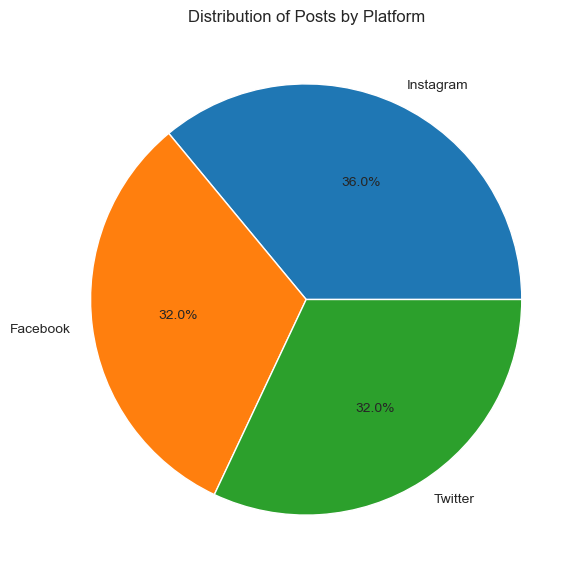

In [368]:
# pie chart representation for percentage of post per platform

plt.figure(figsize=(7,7))
df['platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of Posts by Platform")
plt.ylabel("")
plt.show()



          post_id        likes   comments      shares   engagement  \
count  100.000000   100.000000  100.00000  100.000000   100.000000   
mean    50.500000  2381.810000  202.66000  415.650000  3000.120000   
std     29.011492  1632.573284  138.84067  283.877601  1773.559574   
min      1.000000    15.000000   10.00000   16.000000   435.000000   
25%     25.750000   895.750000   89.75000  183.000000  1497.250000   
50%     50.500000  2220.000000  171.00000  356.500000  2612.500000   
75%     75.250000  3593.250000  299.00000  689.500000  4408.250000   
max    100.000000  5000.000000  500.00000  993.000000  6410.000000   

       engagement_score  
count        100.000000  
mean        3000.120000  
std         1773.559574  
min          435.000000  
25%         1497.250000  
50%         2612.500000  
75%         4408.250000  
max         6410.000000  


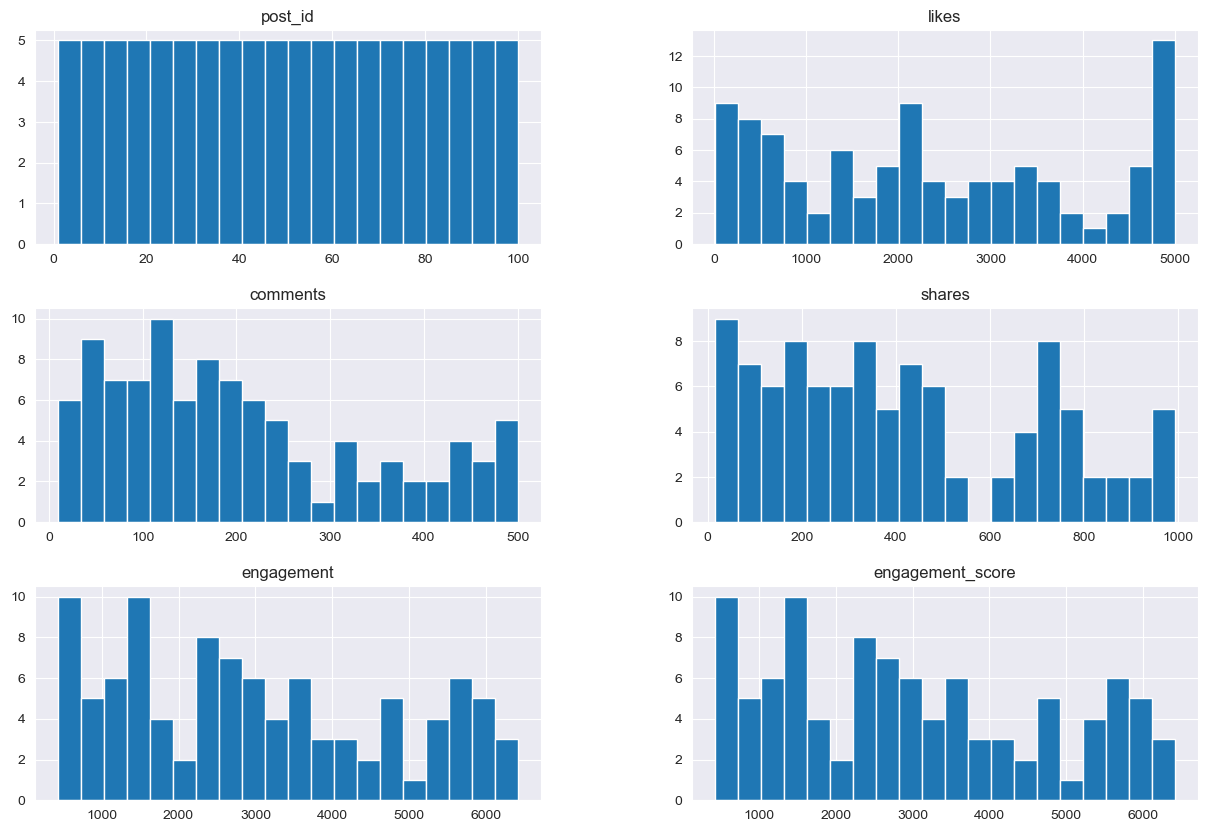

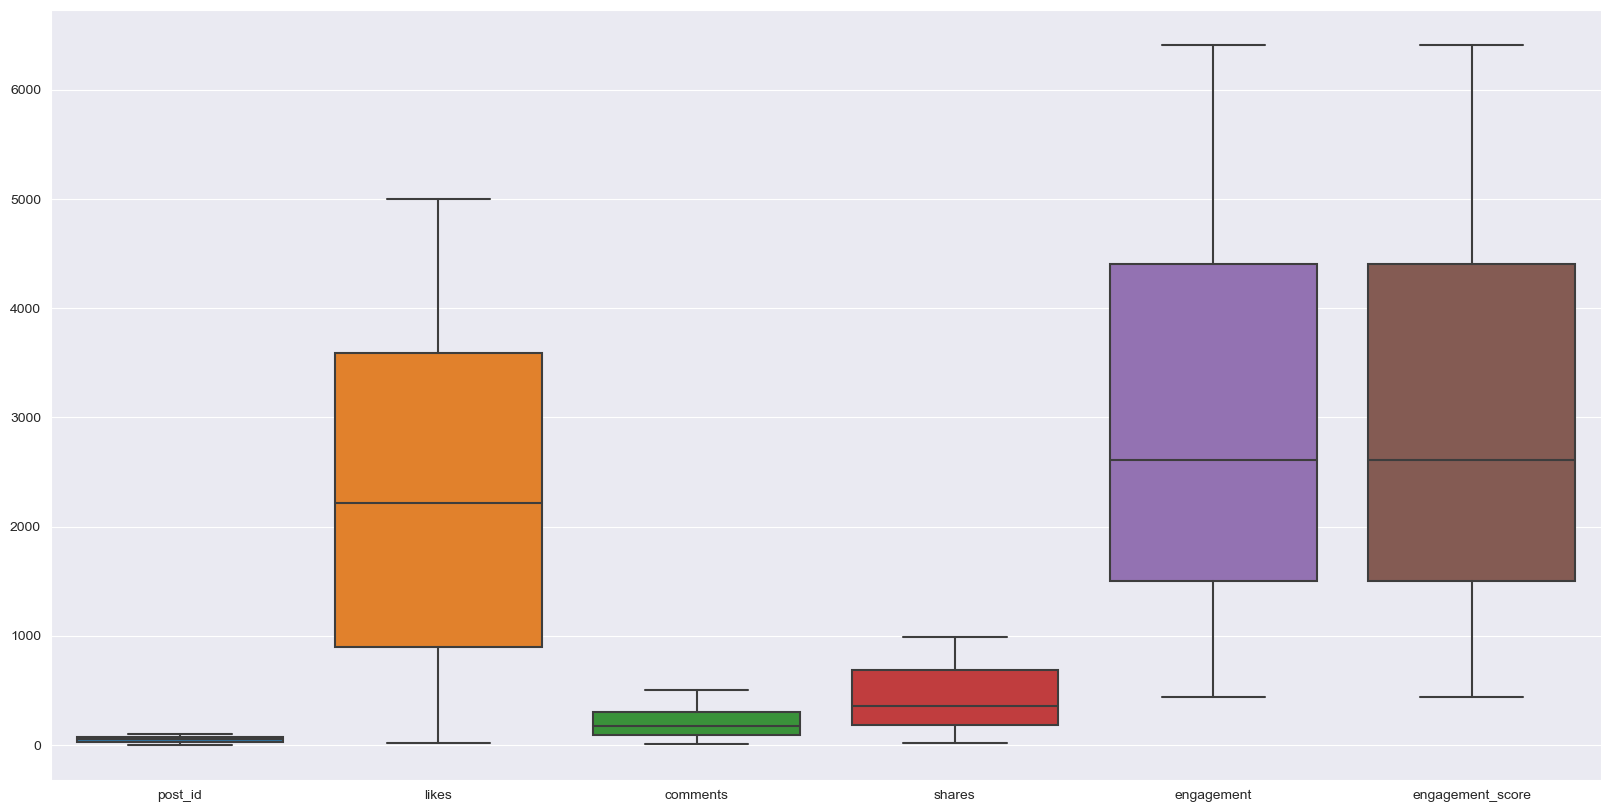

In [369]:
# univarient analysis of numerical data


num = df.select_dtypes(include=['int64', 'float64'])
print(num.describe())


# Histograms
num.hist(bins=20, figsize=(15,10))
plt.show()

# Boxplots
plt.figure(figsize=(20,10))
sns.boxplot(data=num)
plt.show()


In [370]:
# univarient analysis of categorical data


cat = df.select_dtypes(include=['object'])
print(cat.describe())

for c in cat.columns:
    print(f"\nValue counts for {c}:")
    print(cat[c].value_counts())




         platform post_type      post_time   post_day sentiment_score  \
count         100       100            100        100             100   
unique          3         5             99          7               3   
top     Instagram  carousel  5/2/2023 6:15  Wednesday        positive   
freq           36        26              2         18              46   

       engagement_level sentiment_type engagement_rating  
count               100            100               100  
unique                2              2                 4  
top                 Low       Not Good           Average  
freq                 54             54                29  

Value counts for platform:
Instagram    36
Facebook     32
Twitter      32
Name: platform, dtype: int64

Value counts for post_type:
carousel    26
video       23
text        21
image       17
poll        13
Name: post_type, dtype: int64

Value counts for post_time:
5/2/2023 6:15      2
8/17/2023 14:45    1
4/19/2023 19:45    1
4/14/202

Numerical values are: Index(['post_id', 'likes', 'comments', 'shares', 'engagement',
       'engagement_score'],
      dtype='object')


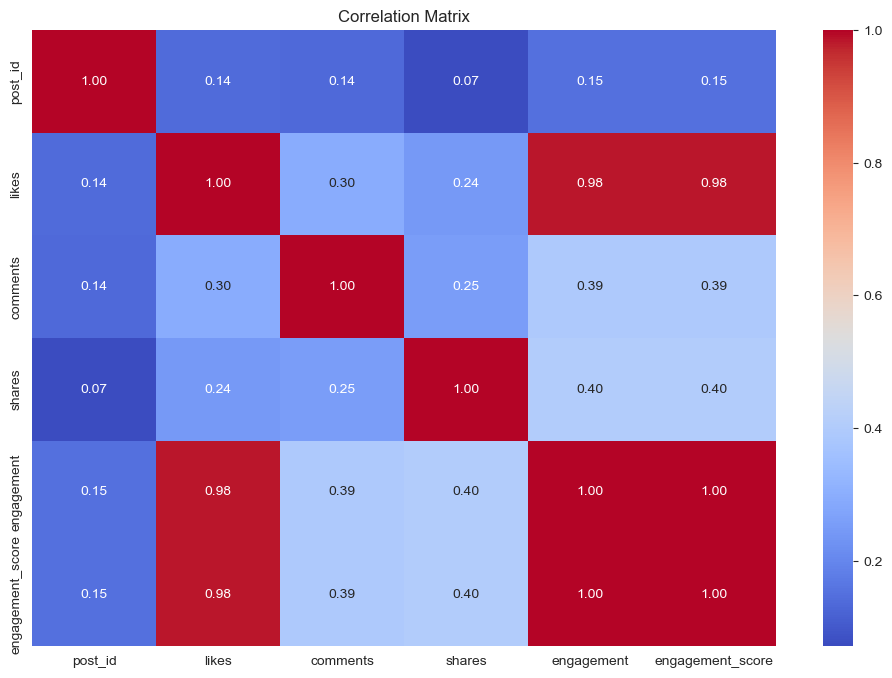

In [371]:
# bivarient analyis


df.duplicated().sum()
numeric_columns= df.select_dtypes(include=['int64', 'float64']) .columns

print("Numerical values are:",numeric_columns)


# numerical vs numerical analysis

corr_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Numerical values are: Index(['post_id', 'likes', 'comments', 'shares', 'engagement',
       'engagement_score'],
      dtype='object')
Categorical values are: Index(['platform', 'post_type', 'post_time', 'post_day', 'sentiment_score',
       'engagement_level', 'sentiment_type', 'engagement_rating'],
      dtype='object')


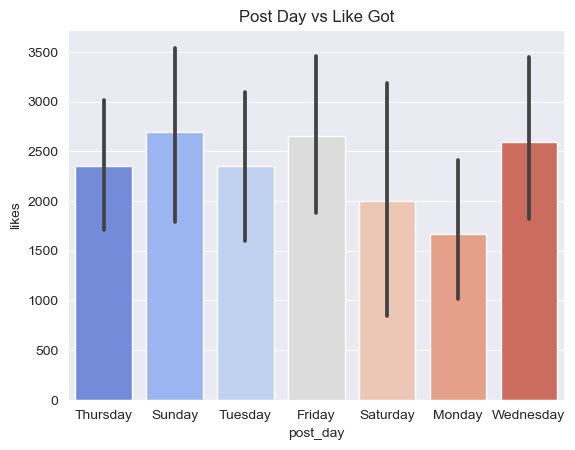

In [372]:
# bivarient numerical vs categorical analysis


df.duplicated().sum()
numeric_columns= df.select_dtypes(include=['int64', 'float64']) .columns  # all numeric columns
cat = df.select_dtypes(include=['object']) .columns
print("Numerical values are:",numeric_columns)
print("Categorical values are:",cat)



# post_day vs like got
sns.barplot(x='post_day', y='likes', data=df, palette='coolwarm')
plt.title("Post Day vs Like Got")
plt.show()





Categorical values are: Index(['platform', 'post_type', 'post_time', 'post_day', 'sentiment_score',
       'engagement_level', 'sentiment_type', 'engagement_rating'],
      dtype='object')
post_type  carousel  image  poll  text  video
platform                                     
Facebook         10      4     3     6      9
Instagram         9      7     6     7      7
Twitter           7      6     4     8      7


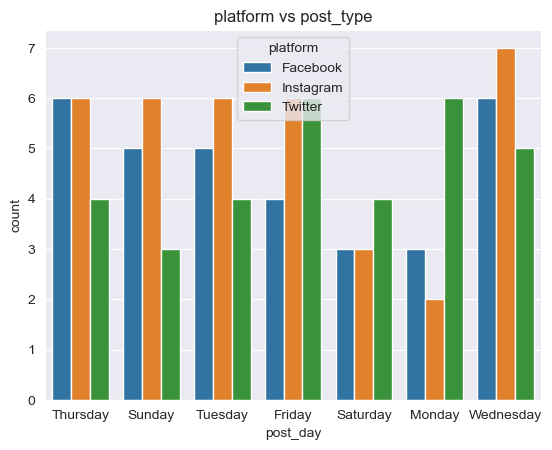

In [373]:
# categorical vs categorical analysis


df.duplicated().sum()
cat = df.select_dtypes(include=['object']) .columns
print("Categorical values are:",cat)


ct = pd.crosstab(df['platform'], df['post_type'])
print(ct)

sns.countplot(x='post_day', hue='platform', data=df)
plt.title('platform vs post_type')
plt.show()


In [374]:
# feature engineering


df['post_time'] = pd.to_datetime(df['post_time'])
df['post_hour'] = df['post_time'].dt.hour
df['post_minute'] = df['post_time'].dt.minute
df['post_day_num'] = df['post_time'].dt.day
df['post_month'] = df['post_time'].dt.month
df['post_year'] = df['post_time'].dt.year
df['is_weekend'] = df['post_time'].dt.dayofweek.isin([5, 6]).astype(int)

print(df.head())

# Time of day categorical feature
def get_time_of_day(x):
    if 5 <= x < 12:
        return 'Morning'
    elif 12 <= x < 17:
        return 'Afternoon'
    elif 17 <= x < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['post_hour'].apply(get_time_of_day)
print(df.columns)


   post_id   platform post_type           post_time  likes  comments  shares  \
0        1   Facebook     image 2023-08-17 14:45:00   2121       474     628   
1        2   Facebook  carousel 2023-05-14 00:45:00   3660       432     694   
2        3  Instagram      poll 2023-02-21 16:15:00   4955       408     688   
3        4    Twitter     image 2023-11-16 00:45:00   1183        90     187   
4        5    Twitter     video 2023-05-23 00:30:00   3499       247     286   

   post_day sentiment_score  engagement engagement_level sentiment_type  \
0  Thursday        positive        3223             High           Good   
1    Sunday         neutral        4786             High       Not Good   
2   Tuesday        negative        6051             High       Not Good   
3  Thursday        negative        1460              Low       Not Good   
4   Tuesday        positive        4032             High           Good   

  engagement_rating  engagement_score  post_hour  post_minute  post_

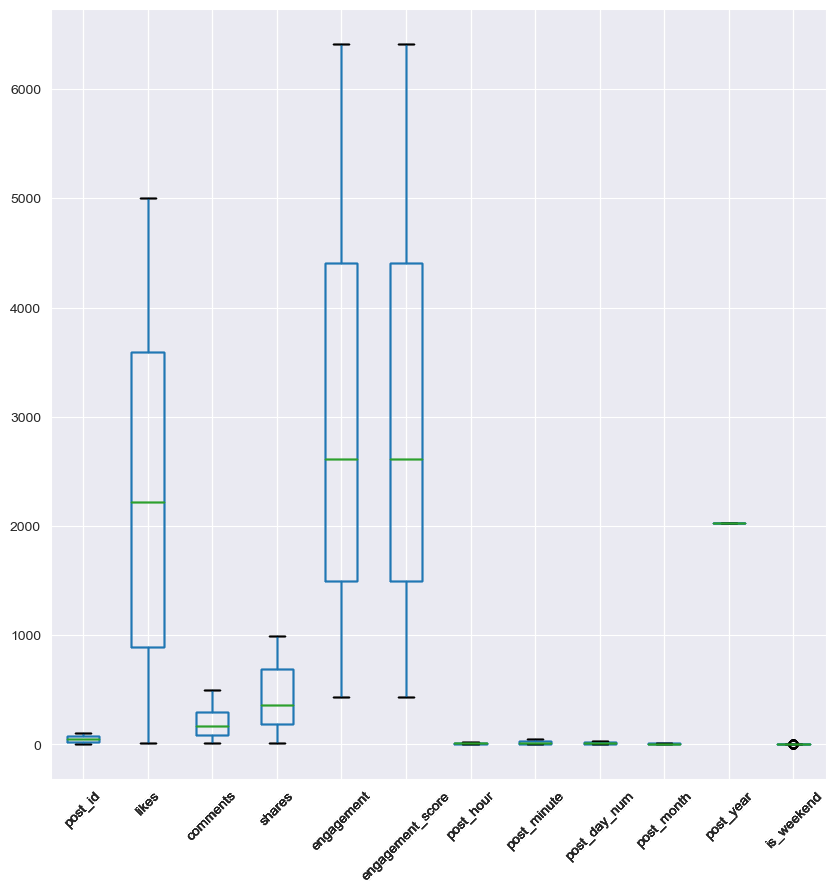

In [375]:
# outlier detection

num_cols = ['likes', 'comments', 'shares', 'engagement_score']

outliers_IQR = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outliers_IQR[col] = outliers

    df.boxplot(figsize=(10,10))
plt.xticks(rotation=45)
plt.show()

After removing outliers: (100, 21)


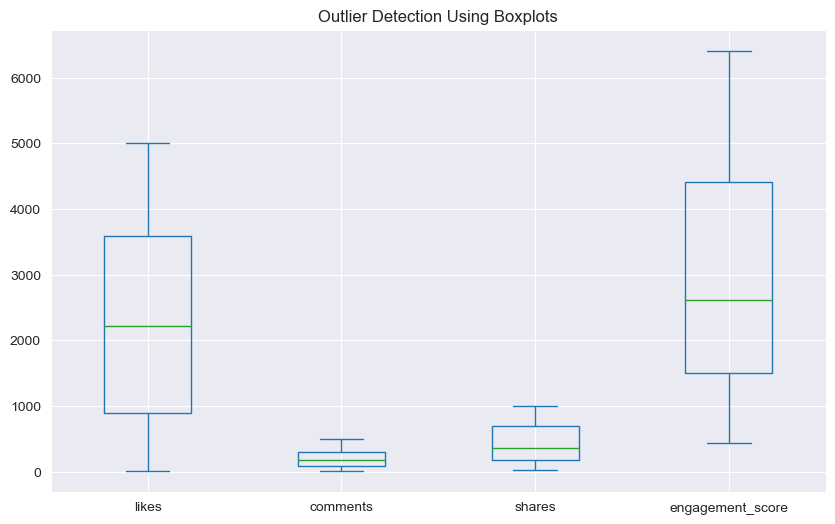

In [376]:
# removing outliers in rainfall using IQR method

def remove_iqr_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] >= lower) & (data[col] <= upper)]

df_clean = df.copy()
for col in num_cols:
    df_clean = remove_iqr_outliers(df_clean, col)

print("After removing outliers:", df_clean.shape)
df[num_cols].plot(kind='box', figsize=(10,6))
plt.title("Outlier Detection Using Boxplots")
plt.show()


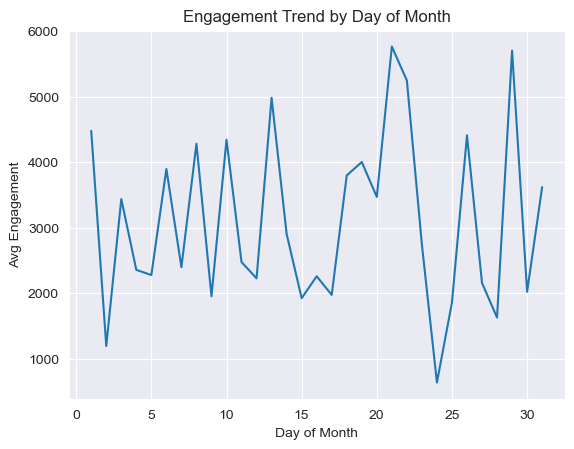

In [377]:
# trend and pattern analysis

# time based trend analysis
df.groupby('post_day_num')['engagement'].mean().plot(kind='line')
plt.title("Engagement Trend by Day of Month")
plt.xlabel("Day of Month")
plt.ylabel("Avg Engagement")
plt.show()


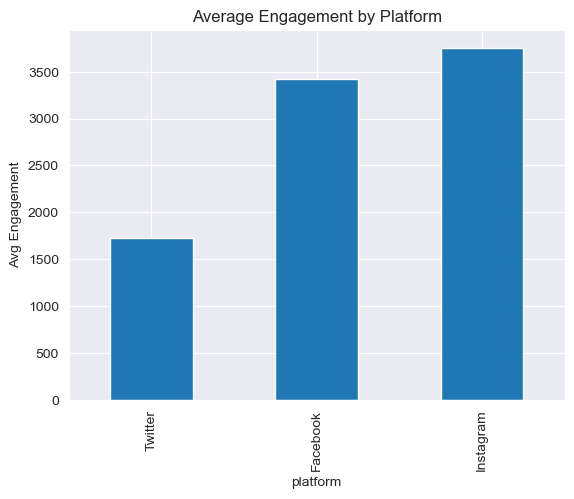

In [378]:
# trend and pattern analysis

# platform wise pattern analysis
df.groupby('platform')['engagement'].mean().sort_values().plot(kind='bar')
plt.title("Average Engagement by Platform")
plt.ylabel("Avg Engagement")
plt.show()


In [ ]:
# platform comparison

platform_cmp = df.groupby('platform')['engagement'].mean().sort_values()

platform_cmp.plot(kind='bar')
plt.title("Average Engagement by Platform")
plt.ylabel("Average Engagement")
plt.show()


Conclusion of Social Media Engagement Dataset

The analysis of your social media engagement dataset shows that user interaction is highly dependent on platform, post type, posting time, and day of posting.



** Instagram is the top-performing platform, generating the highest average engagement.

** Poll-type posts receive the highest engagement, making them the most effective content format.

** Sunday is the best-performing day for posting in terms of engagement.

** 1 AM is the highest engagement hour, indicating late-night user activity is strong.

** The average engagement per post is ~3000 interactions.

** The maximum engagement recorded is 6410, showing strong viral potential in some posts.

** The minimum engagement is 435, indicating that some posts perform poorly and need optimization.

Overall this dataset clearly proves that interactive content, correct timing, and platform selection are the strongest drivers of social media success.

Recommendations
---------------
1. Prioritize Instagram for Promotions

Since Instagram generates the highest engagement:

* Allocate more marketing budget to Instagram.

* Post premium or campaign content on Instagram first.

2. Use More Poll-Based Content

Polls show the highest interaction:

* Use polls for product feedback, audience opinions, and engagement boosts.

* Combine polls with stories and reels for maximum reach.

3. Post on Sundays for Maximum Reach

* Schedule important announcements and campaigns on Sundays.

* Avoid posting crucial content on low-performing weekdays.

4. Schedule Content Around 1 AM

* Late-night posting is very effective for your audience.

* Use automated schedulers to post between 12 AM – 2 AM.

5. Increase Engagement for Low-Performing Posts

For posts with low engagement (below 500):

* Improve captions with strong call-to-action (CTA)

* Add interactive elements like quizzes, questions, and hashtags

* Improve visual quality

6. Monitor Viral Post Patterns

Study posts with engagement above 6000:

* Analyze their post type, timing, and platform

* Replicate similar content strategies

7. Data-Driven Content Strategy

Use this dataset for:

* Monthly engagement forecasting

* Campaign performance prediction

* Influencer collaboration effectiveness